In [40]:
# import the libraries

from bs4 import BeautifulSoup
import pandas as pd
import requests
import urllib.request
import time
import nltk
from newspaper import Article
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import datetime
nltk.download('punkt') # "Punkt Tokenizer Models" divides the text into a list of sentences using ML algorithm

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vinic\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
# # Create lists to store the scraped data
# theme = []
# tag = []
# title = []
# authors = []
# dates = []
# links = []
# texts = []
# summarys = []

# function

In [31]:
# Create a function to scrape the website

def scrape_cnn_website(search, page):
# """ 
# Scrapes the CNN Website based on a theme and a page number and returns a News based DataFrame.
# """
    page_theme = search
    page_number = str(page)

    url = 'https://www.cnnbrasil.com.br/tudo-sobre/' + page_theme + '/' + 'pagina' + page_number +'/' 
    webpage = requests.get(url)
    soup = BeautifulSoup(webpage.text, 'html.parser')

    # Get the location of the information

    article_date = soup.find_all('span', attrs= {'class': 'home__title__date'}) # location of data information
    article_title = soup.find_all('h2', attrs= {'class': 'news-item-header__title'} ) # location of title information
    article_tag = soup.find_all('span', attrs= {'class': 'latest__news__category'} ) # location of the tag
    article_theme = soup.find_all('h1', attrs= {'class': 'tags__topics__title'} ) # location of the theme
    article_links = soup.find_all('a',attrs={'class': 'home__list__tag'} )# location of the links

    # Loop through the article_date

    for i in article_date:
        temp=0
        temp = i.text.strip()
        date = temp[0:10]
        time = temp[14:19]
        date_time = date +'-'+ time

        date_time = pd.to_datetime(date_time,format= '%d/%m/%Y-%H:%M').strftime('%d/%m/%Y - %H:%M')
        dates.append(date_time)

    # Loop through the article_titles and set the theme

    for i in article_title:
        temp = 0
        temp = i.text.strip()
        title.append(temp)
        theme.append(article_theme[0].text.strip().split()[2])

    # Loop through the article_tags

    for i in article_tag:
        temp = 0
        temp = i.text.strip()
        tag.append(temp)

    # Loop through the article_links

    for i in article_links:
        href = i.get('href')
        links.append(href)

          # NLP Process

        article = Article(href)
        article.download()
        article.parse()
        article.nlp()

        site_name = article.meta_data['og']['site_name']
        # title = article.meta_data['og']['title']
        text = article.text
        summary = article.summary
        # author = article.authors
        texts.append(text)
        summarys.append(summary)
        authors.append(site_name)




In [32]:
# Create lists to store the scraped data
theme = []
tag = []
title = []
authors = []
dates = []
links = []
texts = []
summarys = []

# Number of pages to scrap
n = 8

# applying the function
for i in range(1 , n):
    scrape_cnn_website('energia', i )
    print(
    len(authors), 
    len(links), 
    len(theme), 
    len(tag), 
    len(title),
    len(dates), 
    len(texts), 
    len(summarys) 
)

30 30 30 30 30 30 30 30
60 60 60 60 60 60 60 60
90 90 90 90 90 90 90 90
120 120 120 120 120 120 120 120
150 150 150 150 150 150 150 150
180 180 180 180 180 180 180 180
210 210 210 210 210 210 210 210


In [59]:
# create a Data_Frame
df = pd.DataFrame( columns= ['dates','theme','authors','tag','title','summarys','texts','links' ] )
df.dates = dates
df.dates = pd.to_datetime(df.dates,format= '%d/%m/%Y - %H:%M')
df.theme = theme
df.authors = authors
df.tag = tag
df.title = title
df.summarys = summarys
df.texts = texts
df.links = links

date_min = str(df.dates.dt.date.min().strftime('%d/%m/%Y'))+' at '+ str(df.dates.dt.time.min())
date_max = str(df.dates.dt.date.max().strftime('%d/%m/%Y'))+' at '+ str(df.dates.dt.time.max())

df_date_range = 'DF Date Rage: from ['+ date_min + '] to [' + date_max + ']'

print(df_date_range)

DF Date Rage: from [20/12/2021 at 04:30:00] to [13/05/2022 at 23:04:00]


In [62]:
# filter by date

df_filtered = df[df.dates > '2022-01-01']

date_min = str(df_filtered.dates.dt.date.min().strftime('%d/%m/%Y'))+' at '+ str(df_filtered.dates.dt.time.min())
date_max = str(df_filtered.dates.dt.date.max().strftime('%d/%m/%Y'))+' at '+ str(df_filtered.dates.dt.time.max())

date_range = 'Date Rage: from ['+ date_min + '] to [' + date_max + ']'

print(date_range)

df_filtered


Date Rage: from [01/01/2022 at 04:30:00] to [13/05/2022 at 23:04:00]


,dates,theme,authors,tag,title,summarys,texts,links
0,2022-05-13 16:35:00,Energia,CNN Brasil,Internacional,Rússia cortará fornecimento de eletricidade pa...,"“A RAO Nordic Oy, uma subsidiária da entidade ...",Operadora do sistema de transmissão da Finlând...,https://www.cnnbrasil.com.br/internacional/rus...
1,2022-05-13 07:32:00,Energia,CNN Brasil,Business,Produção industrial da zona do euro cai menos ...,"Em termos anuais, a produção de energia caiu 4...","Em termos anuais, a produção de energia caiu 4...",https://www.cnnbrasil.com.br/business/producao...
2,2022-05-12 16:42:00,Energia,CNN Brasil,Business,Europa está ficando sem tempo para encontrar a...,A Rússia respondeu por cerca de 45% das import...,"""Os governos precisam agir agora como se estiv...",https://www.cnnbrasil.com.br/business/europa-e...
3,2022-05-10 14:29:00,Energia,CNN Brasil,Business,Rússia precisa vender petróleo e está ficando ...,Países como a Índia continuam abocando centena...,Tanques de petróleo em Omsk na Rússia: receita...,https://www.cnnbrasil.com.br/business/russia-p...
4,2022-05-10 09:21:00,Energia,CNN Brasil,Nacional,A “minirreforma tributária” e o déjà vu do con...,A intenção de Guedes é mexer nas alíquotas par...,Thais Herédia e Priscila Yazbek apresentam o p...,https://www.cnnbrasil.com.br/nacional/podcast-...
...,...,...,...,...,...,...,...,...
195,2022-01-06 13:09:00,Energia,CNN Brasil,Business,Lei de carvão traz investimentos para economia...,"Em entrevista à CNN, ele afirmou que a legisla...",Projeto sancionado pelo presidente Jair Bolson...,https://www.cnnbrasil.com.br/business/lei-de-c...
196,2022-01-05 15:21:00,Energia,CNN Brasil,Business,EUA tornam-se o maior exportador mundial de gá...,Os Estados Unidos serão o maior exportador do ...,Os Estados Unidos serão o maior exportador do ...,https://www.cnnbrasil.com.br/business/eua-torn...
197,2022-01-04 09:29:00,Energia,CNN Brasil,Business,IPEC: 46% dos brasileiros gastam mais da metad...,O aumento da energia devido à crise hídrica do...,76% acreditam que a conta de luz vai aumentar ...,https://www.cnnbrasil.com.br/business/ipec-46-...
198,2022-01-01 13:58:00,Energia,CNN Brasil,Internacional,Projeto da UE planeja rotular investimentos em...,A Comissão Europeia deve propor regras em jane...,Aplicações precisarão seguir uma lista de ativ...,https://www.cnnbrasil.com.br/internacional/pro...


In [64]:
# WordCloud text and additional parameters

text = " ".join(s.lower() for s in df_filtered.texts)
wordcloud_theme = df_filtered.theme[0].lower()
wordcloud_title = 'Author: '+ df_filtered.authors[0]+' │ Theme: ' + df_filtered.theme[0] +' │ '+ date_range

In [65]:
# StopWords parameters

PORTUGUESE_STOPWORDS_PATCH_1 = r'https://gist.githubusercontent.com/alopes/5358189/raw/2107d809cca6b83ce3d8e04dbd9463283025284f/stopwords.txt'


response_PATCH = requests.get(PORTUGUESE_STOPWORDS_PATCH_1)

pt_stopwords = response_PATCH.text

pt_stopwords = pt_stopwords.replace(" ","").splitlines()   


stop_words  = list(pt_stopwords) + list(STOPWORDS) + [wordcloud_theme,
                                                    'cerca',
                                                    'país',
                                                    'disse',
                                                    'agora',
                                                    'ouvir',
                                                    'notícia',
                                                    'ano' ,
                                                    'entanto',
                                                    'episódio',
                                                    'ainda',
                                                    'acordo',
                                                    'demanda',
                                                    'maior',
                                                    'dia',
                                                    'segundo',
                                                    'pode',
                                                    'desde',
                                                    'todo',
                                                    'sobre']


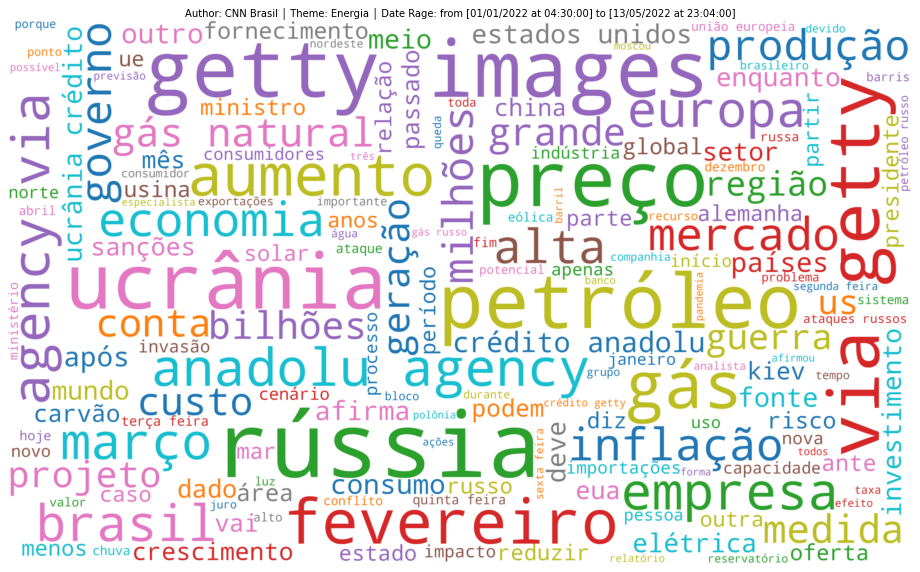

In [66]:
# Plot the WordCloud


plt.figure(figsize=(20,10))



wordcloud = WordCloud(min_font_size=50, 
               max_font_size=500, 
               background_color='white', 
            #    max_words = 80,
               mode="RGB",
               colormap='tab10',
               stopwords=stop_words,
               width=5000, 
               height=3000,
               normalize_plurals= True
).generate(text)




plt.title(wordcloud_title, fontsize=10, color="black")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()